## Pre Processing

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('online_retail.csv', parse_dates=['InvoiceDate'])

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


Checking for missing values

In [5]:
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Description    0.002683
CustomerID     0.249267
dtype: float64

In [6]:
data = data.dropna(subset='CustomerID')
data = data.reset_index(drop = True)

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [10]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [11]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]

In [12]:
basket_UK = (data[data['Country'] =="United Kingdom"]
             .groupby(['InvoiceNo', 'Description'])['Quantity']
             .sum().unstack().reset_index().fillna(0)
             .set_index('InvoiceNo'))

In [13]:
def hot_encode(x):
    if(x <= 0):
        return 0
    if(x >= 1):
        return 1

In [14]:
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

In [15]:
from mlxtend.frequent_patterns import apriori, association_rules

In [16]:
frequent_itemsets = apriori(basket_UK, min_support=0.07, use_colnames=True)
frequent_itemsets

C:\Users\Kanna\anaconda3\envs\Mini Project\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078083,(ASSORTED COLOUR BIRD ORNAMENT)
1,0.086912,(JUMBO BAG RED RETROSPOT)
2,0.077542,(PARTY BUNTING)
3,0.084690,(REGENCY CAKESTAND 3 TIER)
4,0.113160,(WHITE HANGING HEART T-LIGHT HOLDER)


In [22]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

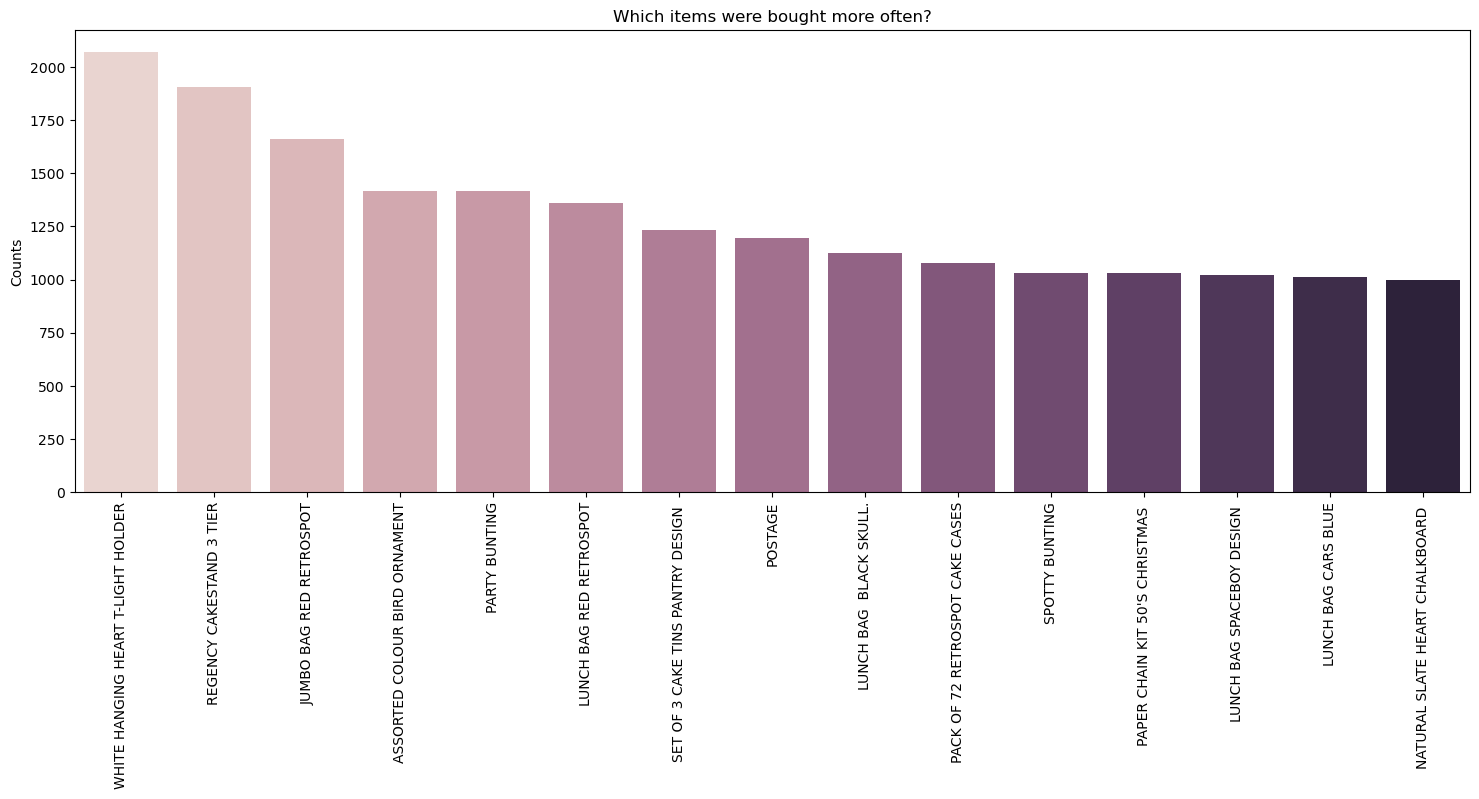

In [28]:
item_counts = data['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [20]:
a=data['Type'].unique()
df=pd.DataFrame(data=a.flatten()).reset_index()
df['Type']=df[0]
df=df[['index','Type']]
df

KeyError: 'Type'